# Titanic z pycaret v1: Pełen automat



*Będziemy kozystać z biblioteki pycaret w podobny sposób, jak instalujemy programy, czyli klikając "Next". Przejdzeimy przez cały proces od importu danych do zapisu modelu oraz predykcji. 
Zobaczymy jaki wynik osiągniemy :)*


In [ ]:
import pandas as pd
from pycaret.classification import *


**from import** *wyglada niepokojąco, ale w tym przypadku jest bezpieczny*


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.shape

(891, 10)

In [ ]:
train.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64


*Typując, że ktoś nie przeżył katastrofy Titanika mam 61,6% na zgadnięcie czy ktoś przeżył czy nie bez tworzenia modelu*




*Wiem, że miałbyć automat, ale nie mogłem się oprzeć wyrzuceniu tych kolumn*


In [ ]:
train.drop(train[['Name', 'Ticket']], axis = 1, inplace= True)
test.drop(test[['Name', 'Ticket']], axis = 1, inplace= True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


______
# Zaczynamy
____                                                           

In [ ]:
tr_data = setup(data = train, target = 'Survived', session_id=123, use_gpu = True)

,Description,Value
0,session_id,123
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(891, 10)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


**pycaret** *może zrobić cały proces przygotowania danych z nas, prawidłowo wykrył obecność brakującyh danych*

In [ ]:
best_model = compare_models(fold = 10, sort = 'AUC',n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8203,0.8579,0.6847,0.8279,0.7484,0.6107,0.6182,1.692
gbc,Gradient Boosting Classifier,0.8186,0.8539,0.7087,0.8080,0.7539,0.6112,0.6156,0.154
lr,Logistic Regression,0.8122,0.8497,0.7582,0.7634,0.7602,0.6059,0.6065,0.239
rf,Random Forest Classifier,0.7896,0.8482,0.7090,0.7505,0.7248,0.5554,0.5603,0.823
lightgbm,Light Gradient Boosting Machine,0.7897,0.8467,0.6925,0.7568,0.7185,0.5519,0.5569,0.778
xgboost,Extreme Gradient Boosting,0.7816,0.8414,0.7132,0.7364,0.7183,0.5409,0.5468,0.753
lda,Linear Discriminant Analysis,0.7994,0.8361,0.7132,0.7609,0.7355,0.5742,0.5757,0.051
et,Extra Trees Classifier,0.7802,0.8280,0.6933,0.7373,0.7100,0.5338,0.5386,0.826
ada,Ada Boost Classifier,0.7785,0.8215,0.7415,0.7114,0.7243,0.5395,0.5418,0.115
dt,Decision Tree Classifier,0.7544,0.7505,0.7173,0.6805,0.6953,0.4905,0.4942,0.015


*Sprawdzamy który model jest najlepszy dla naszych danych, kryterium jakie wybrałem to powierzchnia pod krzywą AUC. Najleprzym modelem okazał się* **catboost**

In [ ]:
print(best_model)

[<catboost.core.CatBoostClassifier object at 0x7f5112f63e80>, GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_st

In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


**pycaret** *dysponuje wieloma modelami, widzimy z jakich bibliotek pochodzą modele*

In [ ]:
cat = create_model('catboost', fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8889,0.8989,0.7600,0.9500,0.8444,0.7597,0.7711
1,0.7937,0.8737,0.6800,0.7727,0.7234,0.5599,0.5628
2,0.7619,0.8311,0.5600,0.7778,0.6512,0.4776,0.4925
3,0.7742,0.7903,0.6800,0.7391,0.7083,0.5246,0.5259
4,0.7903,0.7363,0.6250,0.7895,0.6977,0.5405,0.5491
5,0.8387,0.9046,0.6667,0.8889,0.7619,0.6437,0.6589
6,0.8065,0.8936,0.6667,0.8000,0.7273,0.5792,0.5850
7,0.9032,0.9200,0.8333,0.9091,0.8696,0.7929,0.7948
8,0.8226,0.8564,0.7083,0.8095,0.7556,0.6173,0.6207
9,0.8226,0.8739,0.6667,0.8421,0.7442,0.6112,0.6209


In [ ]:
tuned_cat = tune_model(cat, fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8889,0.8726,0.7600,0.9500,0.8444,0.7597,0.7711
1,0.8413,0.8663,0.7200,0.8571,0.7826,0.6591,0.6653
2,0.7937,0.8395,0.7200,0.7500,0.7347,0.5660,0.5663
3,0.7903,0.8076,0.6800,0.7727,0.7234,0.5557,0.5586
4,0.7742,0.7659,0.5833,0.7778,0.6667,0.5011,0.5130
5,0.8226,0.8871,0.6250,0.8824,0.7317,0.6049,0.6249
6,0.7903,0.8882,0.6250,0.7895,0.6977,0.5405,0.5491
7,0.9032,0.9550,0.8333,0.9091,0.8696,0.7929,0.7948
8,0.8387,0.8629,0.7500,0.8182,0.7826,0.6548,0.6564
9,0.8226,0.8629,0.6667,0.8421,0.7442,0.6112,0.6209


**pycaret** *dysponuje kompletem narzędzi do pracy z modelami, łącznie z optymalizacją najlepszych parametrów dla danego modelu. AUC dla wytrenowego modelu wynosi 0,8579 a dla modelu po optymalizacji wzrasta do 0,8608*

# Wizualizacja 
Zobaczmy jak poradził sobie nasz model

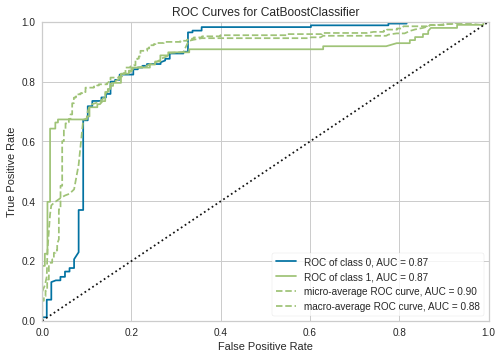

In [ ]:
plot_model(tuned_cat, plot = 'auc')

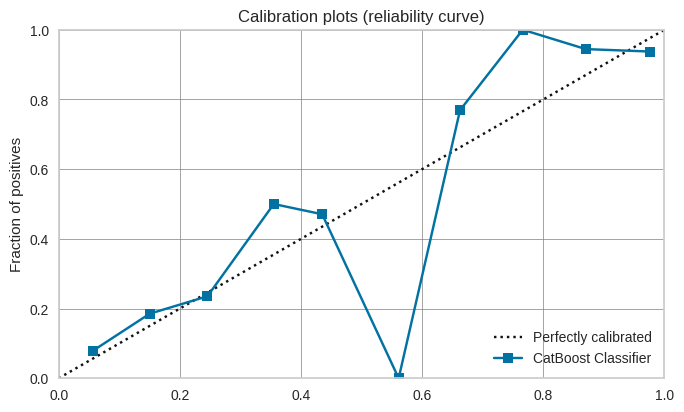

In [ ]:
plot_model(tuned_cat, plot = 'calibration')

*Wykres kalibracji pokazuje,że coś tu poszło nie do końca dobrze, ale jak automat to automat*

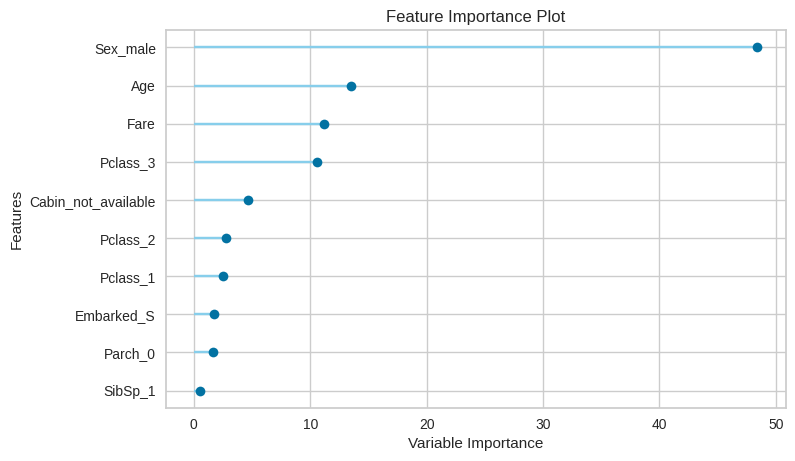

In [ ]:
plot_model(tuned_cat, plot='feature')

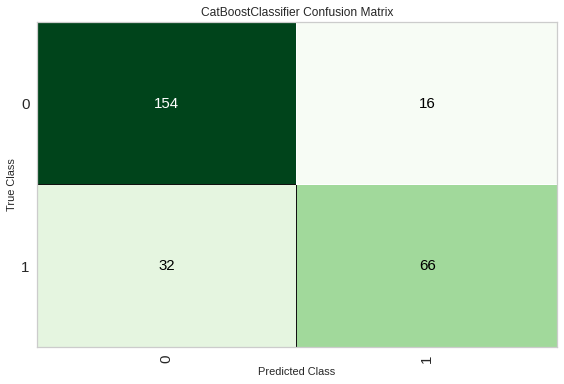

In [ ]:
plot_model(tuned_cat, plot = 'confusion_matrix')

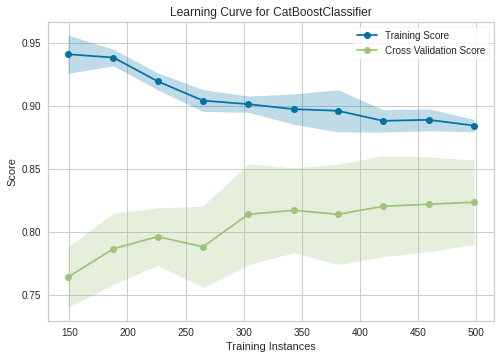

In [ ]:
plot_model(tuned_cat, plot= 'learning', fold=5)

*Hmmmm.....*

In [ ]:
final_cat = finalize_model(tuned_cat)

*Nie bedziemy już modyfikować naszego modelu, czas na zapisać go do późniejszego użycia. Dodatkowo dzięki zapisowi możemy zobaczyć cały przebieg procesu*

In [ ]:
save_model(final_cat,'Final catboost 17sty2021')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=['PassengerId'],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Survived',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=Non...
                 ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='Survived')),
                 ('fix_perfect', Remove_100(target='Survived')),
                 ('clean_names', Clean_Colum_Names()),
        

In [ ]:
nasz_model = load_model('Final catboost 17sty2021')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
prognoza = predict_model(nasz_model, data=test)

*Czas na ostateczny test, czyli sprawdzenie jak nasz model poradzi sobie ze zbiorem testowym*

In [ ]:
prognoza.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Label,Score
0,892,3,male,34.5,0,0,7.8292,NaN,Q,0,0.9060
1,893,3,female,47.0,1,0,7.0000,NaN,S,0,0.6689
2,894,2,male,62.0,0,0,9.6875,NaN,Q,0,0.8501
3,895,3,male,27.0,0,0,8.6625,NaN,S,0,0.8698
4,896,3,female,22.0,1,1,12.2875,NaN,S,0,0.5326
5,897,3,male,14.0,0,0,9.2250,NaN,S,0,0.7869
6,898,3,female,30.0,0,0,7.6292,NaN,Q,1,0.5923
7,899,2,male,26.0,1,1,29.0000,NaN,S,0,0.8505
8,900,3,female,18.0,0,0,7.2292,NaN,C,1,0.7338
9,901,3,male,21.0,2,0,24.1500,NaN,S,0,0.8115


In [ ]:
do_wysylki = pd.DataFrame()
do_wysylki['PassengerId'] = prognoza.PassengerId
do_wysylki['Survived'] = prognoza.Label

In [ ]:
do_wysylki.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [ ]:
do_wysylki.set_index('PassengerId', inplace = True)

In [ ]:
do_wysylki.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [ ]:
do_wysylki.to_csv('pycaret_titanic_basic_polski.csv')

wynik: **0.77511**, czyli po środku tabeli z wynikami

**pycaret** *to bardzo obiecujący i posiadający duże możliwości pakiet, niestety nasz zbiór danych wymaga pewnych działań, automat próbował ale chyba można uzyskać lepszy wynik. Polecenie **setup** zawiera wiele opcji, niekoniecznie wartości domyślne są dla nas najlepsze. Przez analogię do instalowania tzw. "darmowych" programów, klikając cały czas "Next" po instalacji możemy zobaczyć, że w naszym systemie pojawiły się nowe elementy niekoniecznie takie jakie są nam potrzebne, co nie znaczy, że program, który chcieliśmy zainstalować jest niskiej jakości.*